# Install Requirements

In [1]:
!pip install python-bidi

# Libraries

In [2]:
# Disable all warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from bidi.algorithm import get_display
import string
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Download Packages

In [4]:
nltk.download('stopwords')  # download stopwords
nltk.download('punkt')  # download word_tokenize
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Read the Data

In [5]:
spam_ham_dataset = pd.read_csv("/content/spam_ham_dataset.csv", encoding='utf8')
spam_ham_dataset

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [6]:
#Dropping columns that are not needed
spam_ham_dataset = spam_ham_dataset.drop(['Unnamed: 0', 'label'], axis=1)
spam_ham_dataset

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


# Main Cleaning Function

In [7]:
def preprocess_text(text):
    #original string
    pattern = r'[0-9]'
    # Match all digits in the string and replace them with an empty string
    new_string1 = re.sub(pattern, '', text)
    new_string1 = new_string1.replace('“', "")
    new_string1 = new_string1.replace('”', "")
    new_string1 = new_string1.replace('—', "")
    new_string1 = new_string1.replace('؟', "")
    new_string1 = new_string1.replace('؛', "")
    new_string1 = new_string1.replace('،', "")
    new_string1 = new_string1.replace('.', "")
    new_string1 = new_string1.replace('...', "")
    new_string1 = new_string1.replace('’', "")
    new_string1 = new_string1.replace('‘', "")
    new_string1 = new_string1.replace('\n', ' ')
    new1 = new_string1.translate(str.maketrans('', '', string.punctuation))

    # remove stopwords
    stop = list(stopwords.words('english'))
    token_stop1 = [i for i in sent_tokenize(new1) if i.lower() not in stop]

    # WordNetLemmatizer
    lem = WordNetLemmatizer()
    nnew1 = ' '.join([lem.lemmatize(w, pos='v') for w in token_stop1])

    return str(nnew1)

# PreProcessing

In [8]:
#Creating a new feature, extracting subject of each email
subjects = []
for i in range(len(spam_ham_dataset)):
    ln = spam_ham_dataset["text"][i]
    line = ""
    for i in ln:
        if(i == '\r'):
            break
        line = line + i
    line = line.replace("Subject" , "")
    subjects.append(line)

In [9]:
spam_ham_dataset['Subject'] = subjects

In [10]:
#Renaming the dataframe columns
spam_ham_dataset.columns = ["Email_text" , "Labels" , "Email_Subject"]

In [11]:
spam_ham_dataset

,Email_text,Labels,Email_Subject
0,Subject: enron methanol ; meter # : 988291\r\n...,0,: enron methanol ; meter # : 988291
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,": hpl nom for january 9 , 2001"
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,: neon retreat
3,"Subject: photoshop , windows , office . cheap ...",1,": photoshop , windows , office . cheap . main ..."
4,Subject: re : indian springs\r\nthis deal is t...,0,: re : indian springs
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,: put the 10 on the ft
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,: 3 / 4 / 2000 and following noms
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,: calpine daily gas nomination
5169,Subject: industrial worksheets for august 2000...,0,: industrial worksheets for august 2000 activity


In [12]:
#Dropping columns that are not needed
spam_ham_dataset = spam_ham_dataset.drop(['Email_text'], axis=1)
spam_ham_dataset

,Labels,Email_Subject
0,0,: enron methanol ; meter # : 988291
1,0,": hpl nom for january 9 , 2001"
2,0,: neon retreat
3,1,": photoshop , windows , office . cheap . main ..."
4,0,: re : indian springs
...,...,...
5166,0,: put the 10 on the ft
5167,0,: 3 / 4 / 2000 and following noms
5168,0,: calpine daily gas nomination
5169,0,: industrial worksheets for august 2000 activity


# Splitting the data into features and target

In [13]:
x = spam_ham_dataset.drop(['Labels'],axis=1)
x

,Email_Subject
0,: enron methanol ; meter # : 988291
1,": hpl nom for january 9 , 2001"
2,: neon retreat
3,": photoshop , windows , office . cheap . main ..."
4,: re : indian springs
...,...
5166,: put the 10 on the ft
5167,: 3 / 4 / 2000 and following noms
5168,: calpine daily gas nomination
5169,: industrial worksheets for august 2000 activity


In [14]:
y = spam_ham_dataset['Labels']
y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: Labels, Length: 5171, dtype: int64

# Splitting the data into Train and Test

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4136, 1), (1035, 1), (4136,), (1035,))

# Cleaning

## Training

In [17]:
xx_trainn = []
for i in x_train.Email_Subject:
  xx_trainn.append(i)
xx_trainn

[': april activity surveys',
 ': message subject',
 ': txu fuels / sds nomination for may 2001',
 ': re : richardson volumes nov 99 and dec 99 meter 0987283',
 ': a new era of online medical care .',
 ': mobil beaumont',
 ': tenaska iv outage update',
 ': y 2 k - texas log',
 ': june specials ! !',
 ': hpl nom for april 5 , 2001',
 ': exxonmobil beaumont refinery fuel needs',
 ': sparkasse security issue',
 ': druuugs onliiiiine very cheaaaap',
 ': re : noms / actual flow for 3 / 21 / 01',
 ': survivor junction',
 ': desk to desk deal needed at meter 378 for february 2000',
 ': fw : " red , white and blue out "',
 ': lonestar payback for 31 st',
 ': additional recruiting',
 ': tenaska marketing ventures - 04 / 01 prod',
 ': ena organizational changes',
 ': ',
 ': 708760',
 ': off shors account ready - accordant dispensable',
 ': saxet canales into king ranch - balancing issue',
 ': re : noms / actual flow for 3 / 29 / 01',
 ': re : entex volumes',
 ': calpine january 2000 nomination',


In [18]:
xx_train = []
for i in xx_trainn:
  xx_train.append(preprocess_text(i))
xx_train

[' april activity surveys',
 ' message subject',
 ' txu fuels  sds nomination for may',
 ' re  richardson volumes nov  and dec  meter',
 ' a new era of online medical care',
 ' mobil beaumont',
 ' tenaska iv outage update',
 ' y  k  texas log',
 ' june specials',
 ' hpl nom for april',
 ' exxonmobil beaumont refinery fuel needs',
 ' sparkasse security issue',
 ' druuugs onliiiiine very cheaaaap',
 ' re  noms  actual flow for',
 ' survivor junction',
 ' desk to desk deal needed at meter  for february',
 ' fw   red  white and blue out',
 ' lonestar payback for  st',
 ' additional recruiting',
 ' tenaska marketing ventures     prod',
 ' ena organizational changes',
 '',
 '',
 ' off shors account ready  accordant dispensable',
 ' saxet canales into king ranch  balancing issue',
 ' re  noms  actual flow for',
 ' re  entex volumes',
 ' calpine january  nomination',
 ' nomination       eastrans',
 ' natural gas nomination for february',
 ' the smart way to control spam',
 ' enron  hpl actuals

## Testing

In [19]:
xx_testt = []
for i in x_test.Email_Subject:
  xx_testt.append(i)
xx_testt

[': hpl nom for march 30 , 2001',
 ': online pharxmacy 80 % off all meds',
 ': re : nom / actual volume for april 17 th',
 ': re : meter 8740 dec 99',
 ': re : coastal oil & gas corporation',
 ': enron / hpl actuals for july 27 , 2000',
 ': re : meter 98 - 9699 & 98 - 2662 ( receipt meters w / delivery noms )',
 ': hpl nom for may 3 , 2001',
 ': enron / hpl noms for february 23 - 25 , 2001',
 ': tenaska iv transport 10 / 00',
 ': moving the list . . .',
 ': fw : customer list',
 ': wow , , , , cash out @ 4 . 19 %',
 ': awesome movies of the super sexy jaime pressly',
 ': ad - when he said he could make me famous if i gave him head on video i asked him if he the batteries were charged sexually - explicit',
 ': revisions - march wellhead estimate',
 ': revision # 1 - hpl nom for august 11 , 2000',
 ': cp & l',
 ': upgrade your os to xp pro for $ 50',
 ': re : valero - - meter 8018',
 ': road - show . com q 4 i . com choose enron to deliver financial web content',
 ': indian springs',
 ':

In [20]:
xx_test = []
for i in xx_testt:
  xx_test.append(preprocess_text(i))
xx_test

[' hpl nom for march',
 ' online pharxmacy   off all meds',
 ' re  nom  actual volume for april  th',
 ' re  meter  dec',
 ' re  coastal oil  gas corporation',
 ' enron  hpl actuals for july',
 ' re  meter         receipt meters w  delivery noms',
 ' hpl nom for may',
 ' enron  hpl noms for february',
 ' tenaska iv transport',
 ' moving the list',
 ' fw  customer list',
 ' wow     cash out',
 ' awesome movies of the super sexy jaime pressly',
 ' ad  when he said he could make me famous if i gave him head on video i asked him if he the batteries were charged sexually  explicit',
 ' revisions  march wellhead estimate',
 ' revision    hpl nom for august',
 ' cp  l',
 ' upgrade your os to xp pro for',
 ' re  valero   meter',
 ' road  show  com q  i  com choose enron to deliver financial web content',
 ' indian springs',
 ' enron  hpl actuals for january',
 ' re  epgt',
 ' re  base gas roll',
 ' deal',
 ' looking for cheap high  quality software  teethe minus',
 ' hpl noms for nov',
 ' re  

# Feature Extraction

## Bag of words

In [21]:
max_features=500 # "number" most common(used) words in cult

In [22]:
vectorizer = CountVectorizer()

In [23]:
X_train_bow = vectorizer.fit_transform(xx_train).toarray()
X_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
X_train_bow.shape

(4136, 4012)

In [25]:
X_test_bow = vectorizer.transform(xx_test).toarray()
X_test_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
X_test_bow.shape

(1035, 4012)

# Machine Learning Models

## Models on Bag of Word

### LogisticRegression

In [27]:
# Next, we need to create our model by instantiating an instance of the LogisticRegression object.
model_logistic_bow = LogisticRegression(random_state=1)

In [28]:
# To train the model, we need to call the fit method on the LogisticRegression object we just created and pass in our
# x_train and y_train variables
model_logistic_bow.fit(X_train_bow, y_train)

LogisticRegression(random_state=1)

In [29]:
# Making Predictions With Our Logistic Regression Model
predictions_logistic_bow = model_logistic_bow.predict(X_test_bow)

In [30]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predictions_logistic_bow))

[[726  16]
 [ 72 221]]


In [31]:
cm = confusion_matrix(y_test, predictions_logistic_bow, labels=model_logistic_bow.classes_)

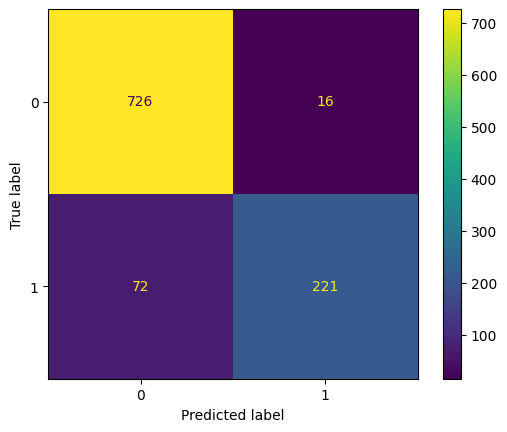

In [32]:
# We will plotting the confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_logistic_bow.classes_)
disp.plot()

plt.show()

In [33]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test, predictions_logistic_bow))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       742
           1       0.93      0.75      0.83       293

    accuracy                           0.91      1035
   macro avg       0.92      0.87      0.89      1035
weighted avg       0.92      0.91      0.91      1035



### Naive Bayes

In [34]:
# we assign the output to an object called model.
model_nb_bow = GaussianNB()

In [35]:
# Here, we are using XGBClassifier as a Machine Learning model to fit the data.
model_nb_bow.fit(X_train_bow, y_train)

GaussianNB()

In [36]:
predicted_nb_bow = model_nb_bow.predict(X_test_bow)

In [37]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predicted_nb_bow))

[[724  18]
 [101 192]]


In [38]:
cm = confusion_matrix(y_test, predicted_nb_bow, labels=model_nb_bow.classes_)

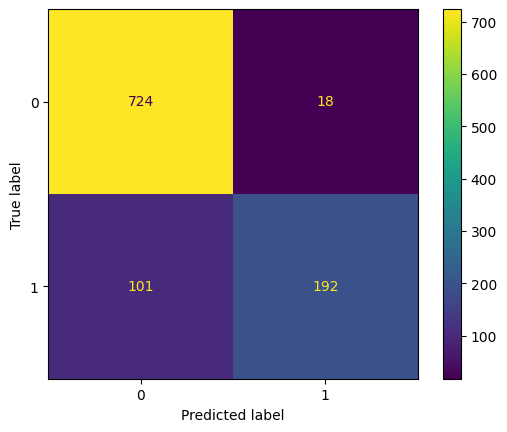

In [39]:
# We will plotting the confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_nb_bow.classes_)
disp.plot()

plt.show()

In [40]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test, predicted_nb_bow))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       742
           1       0.91      0.66      0.76       293

    accuracy                           0.89      1035
   macro avg       0.90      0.82      0.84      1035
weighted avg       0.89      0.89      0.88      1035



# WordCloud

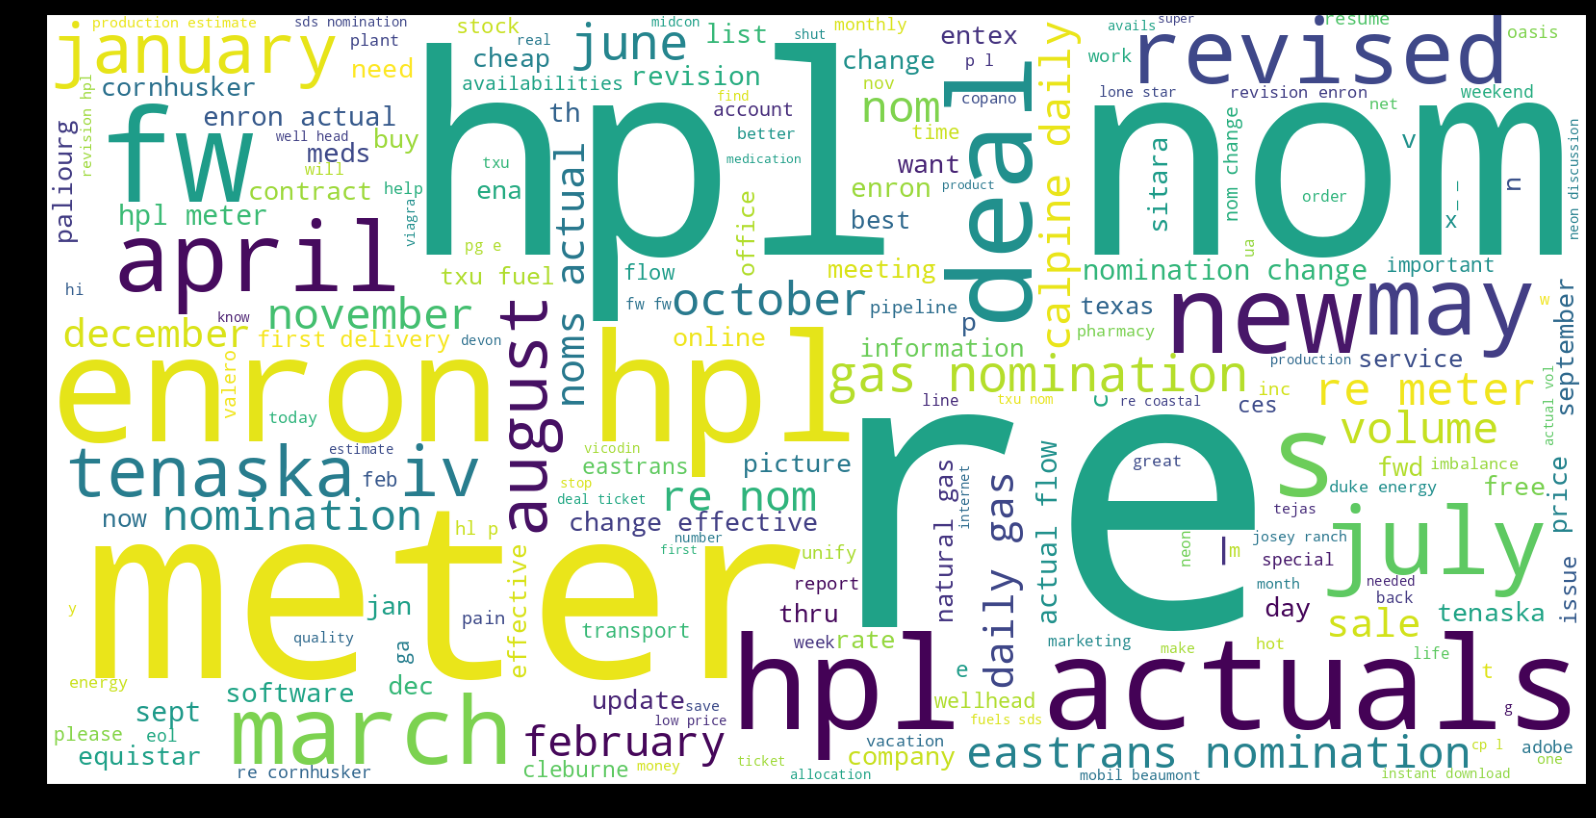

In [41]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(spam_ham_dataset['Email_Subject']))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)